In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df=pd.read_csv('fcc-forum-pageviews.csv',index_col='date',skip_blank_lines=False,parse_dates=True)

In [4]:
#cleaning
df=df[(df['value']>df['value'].quantile(0.025)) & (df['value']<df['value'].quantile(0.975))]

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

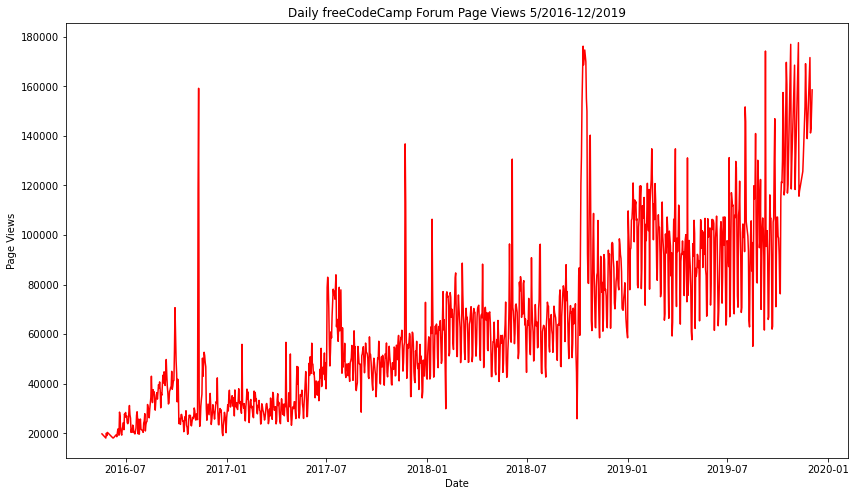

In [6]:
plt.figure(figsize=(14,8))
plt.plot(df.index,df['value'],'-r')
plt.ylabel('Page Views')
plt.xlabel('Date')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
#part1

In [17]:
df_bar = df.copy()
df_bar.reset_index(inplace=True)

df_bar['year'] = [d.year for d in df_bar.date]
df_bar['month'] = [d.strftime('%b') for d in df_bar.date]


<bound method NDFrame.head of            date   value  year month
0    2016-05-19   19736  2016   May
1    2016-05-26   18060  2016   May
2    2016-05-27   19997  2016   May
3    2016-05-28   19044  2016   May
4    2016-05-29   20325  2016   May
...         ...     ...   ...   ...
1233 2019-11-24  138875  2019   Nov
1234 2019-11-29  171584  2019   Nov
1235 2019-11-30  141161  2019   Nov
1236 2019-12-01  142918  2019   Dec
1237 2019-12-03  158549  2019   Dec

[1238 rows x 4 columns]>

In [18]:
sns.catplot(x='month',y='value',col='year',kind='bar',data=df_bar,legend=True,order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])


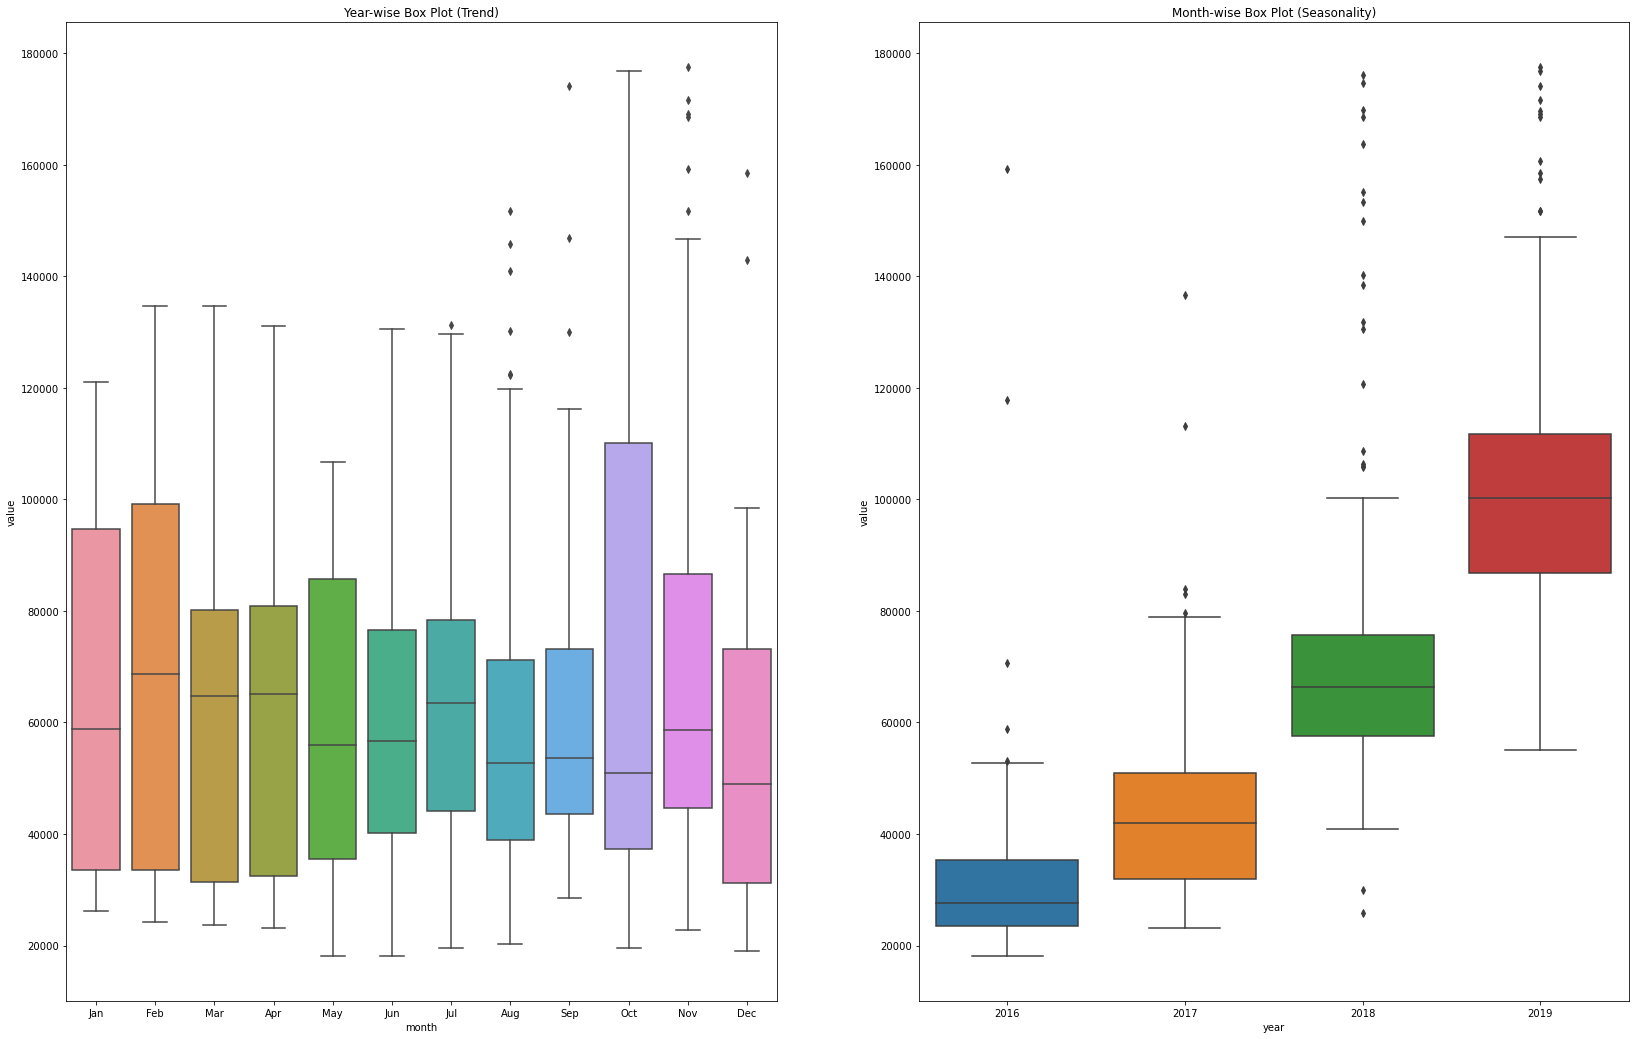

In [21]:
df_box = df_bar.copy()

fig, ax =plt.subplots(1,2,figsize=(28,18))

sns.boxplot(ax=ax[0],x=df_box['month'],y=df_box['value'],order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
sns.boxplot(x=df_box['year'],y=df_box['value'], ax=ax[1] )

ax[0].title.set_text('Year-wise Box Plot (Trend)')
ax[1].title.set_text('Month-wise Box Plot (Seasonality)')
